# Ex
### Exercise 9.1
- 3, 8, 9, 10, 13, 18

### Exercise 8.2
- 1, 3, 4, 5, 6, 7, 18, 19

### Exercise 8.3
- 3, 4, 8, 16, 26, 27

### Exercise 8.3
- 5, 8, 18

# Com Ex
### Computer Exercise 8.1
- 3

### Computer Exercise 8.2
-10(a)

### Computer Exercise 8.3
- 4

### Computer Exercise 8.4
- 2, 6

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Least squares fit: y = 2.21x + 1.82


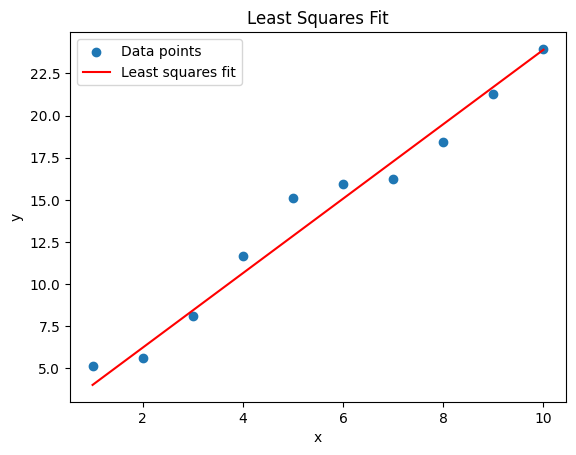

In [2]:
# 9.1 - 3

def least_squares_fit(x, y):
    n = len(x)
    s = np.sum(x**2)
    r = np.sum(x*y)
    p = np.sum(x)
    q = np.sum(y)
    
    d = (n + 1) * s - p**2
    a = ((n + 1) * r - p * q) / d
    b = (s * q - p * r) / d
    
    return a, b

x = np.arange(1, 11)
y = x * 2 + 3 + np.random.normal(0, 1, len(x))
a, b = least_squares_fit(x, y)

print(f"Least squares fit: y = {a:.2f}x + {b:.2f}")
plt.scatter(x, y, label='Data points')
plt.plot(x, a*x + b, color='red', label='Least squares fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit')
plt.legend()
plt.show()

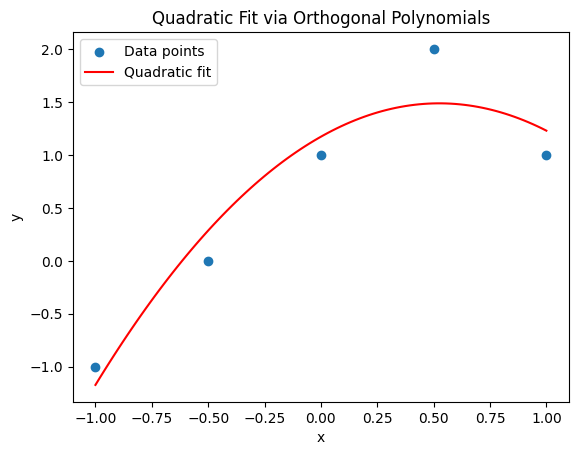

In [3]:
# 9.2 - 10(a)

def orthogonal_polynomials(x, degree):
    n = len(x)
    Q = np.zeros((n, degree + 1))
    Q[:, 0] = 1.0

    for k in range(1, degree + 1):
        p = x**k
        for j in range(k):
            coeff = np.dot(p, Q[:, j]) / np.dot(Q[:, j], Q[:, j])
            p = p - coeff * Q[:, j]
        Q[:, k] = p
    return Q

def fit_quadratic_via_orthogonal(x, y):
    Q = orthogonal_polynomials(x, degree=2)
    c = np.linalg.solve(Q.T @ Q, Q.T @ y)

    A, B, C = np.polyfit(x, y, 2)
    return A, B, C

x = np.array([-1, -0.5, 0, 0.5, 1], dtype=float)
y = np.array([-1, 0, 1, 2, 1], dtype=float)
x_range = np.linspace(-1, 1, 100)

A, B, C = fit_quadratic_via_orthogonal(x, y)

y_pred = A*x_range**2 + B*x_range + C

plt.scatter(x, y, label='Data points')
plt.plot(x_range, y_pred, color='red', label='Quadratic fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Fit via Orthogonal Polynomials')
plt.legend()
plt.show()

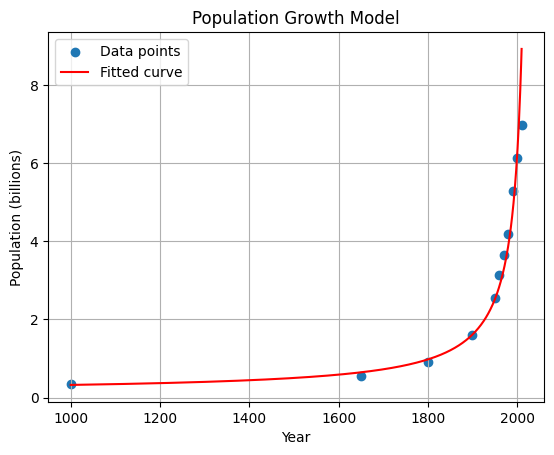

Infinite Derivative Year: 2032.27


In [12]:
# 9.3 - 4

year = np.array([1000,1650,1800,1900,1950,1960,1970,1980,1990,2000,2010], dtype=float)
pop  = np.array([0.340,0.545,0.907,1.61,2.56,3.15,3.65,4.20,5.30,6.12,6.98], dtype=float)
x    = np.linspace(1000, 2010, 1000)

X = np.column_stack([
    np.ones_like(year),
    year,
    - year * pop
])
y = pop

XtX = X.T @ X
Xty = X.T @ y

beta = np.linalg.solve(XtX, Xty)
a, b, c = beta

x_inf = -1.0 / c

plt.scatter(year, pop, label='Data points')
plt.plot(x, (a + b * x) / (1 + c * x), color='red', label='Fitted curve')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.title('Population Growth Model')
plt.legend()
plt.grid()
plt.show()

print(f"Infinite Derivative Year: {x_inf:.2f}")


In [ ]:
# 9.4 - 2

def nth_roots_of_unity(n):
    k = np.arange(1, n+1)
    omega = np.exp(1j * 2 * np.pi * k / n)
    return omega

def analyze_roots(n):
    omega = nth_roots_of_unity(n)
    
    power_n = omega**n
    
    sum1 = np.sum(omega)
    sum2 = np.sum(omega**2)
    prod = np.prod(omega)
    
    return {
        'omega': omega,
        'omega^n': power_n,
        'sum(omega)': sum1,
        'sum(omega^2)': sum2,
        'prod(omega)': prod
    }
    
def build_matrix(n):
    omega = nth_roots_of_unity(n)
    matrix = np.zeros((n, n), dtype=complex)
    
    for i in range(n):
        for j in range(n):
            matrix[i, j] = omega[i] ** (i * j)
            
    return matrix

n = 5
result = analyze_roots(n)

print(f"{n}차 단위근 ω_k:")
for k, w in enumerate(result['omega'], start=1):
    print(f"ω_{k} = {w:.4f}, ω_{k}^n = {result['omega^n'][k-1]:.4f}")

print(f"\nsum(omega)       = {result['sum(omega)']:.6f}")
print(f"sum(omega^2)     = {result['sum(omega^2)']:.6f}")
print(f"prod(omega)      = {result['prod(omega)']:.6f}")

print("\nMatrix:")
print(build_matrix(n))
print("\nDeterminant of the matrix:", np.linalg.det(build_matrix(n)))


5차 단위근 ω_k:
ω_1 = 0.3090+0.9511j, ω_1^n = 1.0000-0.0000j
ω_2 = -0.8090+0.5878j, ω_2^n = 1.0000-0.0000j
ω_3 = -0.8090-0.5878j, ω_3^n = 1.0000-0.0000j
ω_4 = 0.3090-0.9511j, ω_4^n = 1.0000-0.0000j
ω_5 = 1.0000-0.0000j, ω_5^n = 1.0000-0.0000j

sum(omega)       = 0.000000-0.000000j
sum(omega^2)     = -0.000000-0.000000j
prod(omega)      = 1.000000-0.000000j

Matrix:
[[ 1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j]
 [ 1.        +0.00000000e+00j -0.80901699+5.87785252e-01j
   0.30901699-9.51056516e-01j  0.30901699+9.51056516e-01j
  -0.80901699-5.87785252e-01j]
 [ 1.        +0.00000000e+00j  0.30901699+9.51056516e-01j
  -0.80901699+5.87785252e-01j -0.80901699-5.87785252e-01j
   0.30901699-9.51056516e-01j]
 [ 1.        +0.00000000e+00j -0.80901699+5.87785252e-01j
   0.30901699-9.51056516e-01j  0.30901699+9.51056516e-01j
  -0.80901699-5.87785252e-01j]
 [ 1.        +0.00000000e+00j  1.        -9.7971

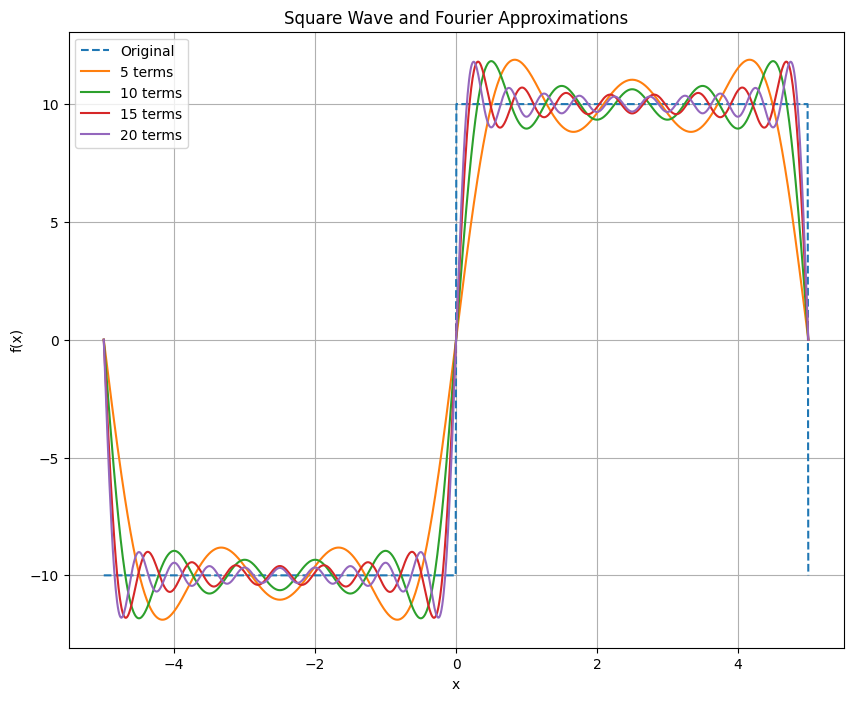

In [10]:
# 9.4 - 6

A = 10
P = 10
omega0 = 2 * np.pi / P

def bn(n):
    return 40 / (n * np.pi) if n % 2 == 1 else 0

def square_wave(x):
    return np.where((x % P) < P/2, A, -A)

def trig_poly(x, N):
    s = 0
    for k in range(1, N+1):
        b = bn(k)
        s += b * np.sin(k * omega0 * x)
    return s

x = np.linspace(-P/2, P/2, 1000)
y = square_wave(x)

terms_list = [5, 10, 15, 20]

plt.figure(figsize=(10, 8))
plt.plot(x, y, label='Original', linestyle='--')

for N in terms_list:
    yN = trig_poly(x, N)
    plt.plot(x, yN, label=f'{N} terms')

plt.title('Square Wave and Fourier Approximations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()